In [9]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from pmdarima.arima import ARIMA
import time

In [41]:
df = pd.read_excel("/Users/mehmet/Desktop/puant.xlsx")

In [42]:
df.set_index("Zaman",inplace=True)
df.index = pd.to_datetime(df.index)
print(df.index)
print(df['Deger'])

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Zaman', length=365, freq=None)
Zaman
2021-01-01    33572.53
2021-01-02    35114.09
2021-01-03    34930.15
2021-01-04    41244.36
2021-01-05    41827.04
                ...   
2021-12-27    45689.44
2021-12-28    45180.90
2021-12-29    45410.06
2021-12-30    44800.78
2021-12-31    43365.23
Name: Deger, Length: 365, dtype: float64


In [43]:
df.head()

,Deger
Zaman,
2021-01-01,33572.53
2021-01-02,35114.09
2021-01-03,34930.15
2021-01-04,41244.36
2021-01-05,41827.04


In [44]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df["Deger"])

(0.01, False)

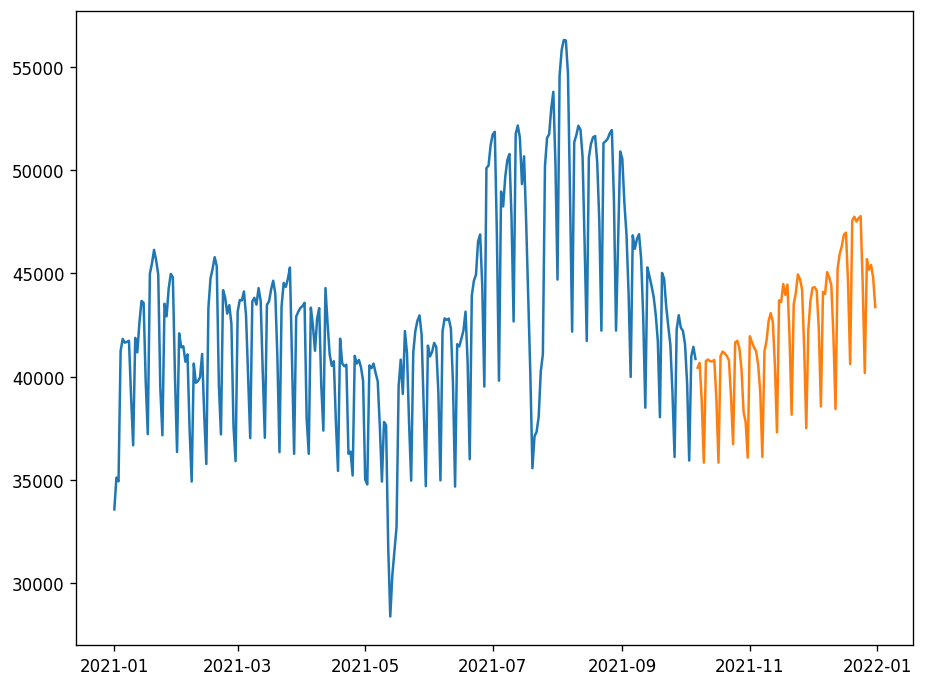

In [87]:
train = df.loc[:datetime.date(year=2021,month=10,day=6)]
test = df.loc[datetime.date(year=2021,month=10,day=7):datetime.date(year=2021,month=12,day=31)]
plt.plot(train["Deger"])
plt.plot(test["Deger"])

In [88]:
avg, dev = train["Deger"].mean(), train["Deger"].std()

In [89]:
input_daily_diff = ((train["Deger"] - avg) / dev).diff(1).dropna()
#input_daily_diff = train["Deger"].diff(1).dropna()
input_daytype_diff = train["Deger"].diff(7).dropna()

In [57]:
arima_model_daily = auto_arima(input_daily_diff, start_p=0, d=1, start_q = 0,
                               max_p = 7, max_d = 2, max_q = 7, start_P = 0,
                               D = 1, start_Q = 0, max_P = 3, max_D = 2,
                               max_Q = 3, m = 7, seasonal = True,
                               error_action = "warn", trace = True,
                               suppress_warnings = True, stepwise = True,
                               random_state = 20, n_fits = 50)
arima_model_daytype = auto_arima(input_daytype_diff, start_p=0, d=1, start_q = 0,
                         max_p = 7, max_d = 2, max_q = 7, start_P = 0,
                         D = 1, start_Q = 0, max_P = 3, max_D = 2,
                         max_Q = 3, m = 7, seasonal = True,
                         error_action = "warn", trace = True,
                         suppress_warnings = True, stepwise = True,
                         random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=462.253, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=379.157, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=425.564, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=363.032, Time=0.12 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=332.306, Time=0.23 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=302.707, Time=0.54 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=302.645, Time=0.27 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=300.782, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=310.672, Time=0.12 sec
 ARIMA(1,1,0)(1,1,2)[7]             : AIC=302.705, Time=0.34 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=301.284, Time=0.19 sec
 ARIMA(1,1,0)(2,1,2)[7]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=343.929, Time=0.07 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=0.1

In [31]:
arima_model_daily.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  345
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 7)   Log Likelihood                -149.022
Date:                             Fri, 26 Aug 2022   AIC                            306.044
Time:                                     15:11:01   BIC                            321.325
Sample:                                 01-02-2021   HQIC                           312.135
                                      - 12-12-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3604      0.033    -10.891      0.000      -0.425      -0.296
ar.S.L7        0.2226      0.056      3.998      0.000       0.113       0.332
ma.S.L7       -0.9262      0.034    -27.240      0.000      -0.993      -0.860
sigma2         0.1373      0.006     22.914      0.000       0.126       0.149
===================================================================================
Ljung-Box (L1) (Q):                   3.66   Jarque-Bera (JB):              1159.98
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.20
Prob(H) (two-sided):                  0.55   Kurtosis:                        12.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<BarContainer object of 20 artists>

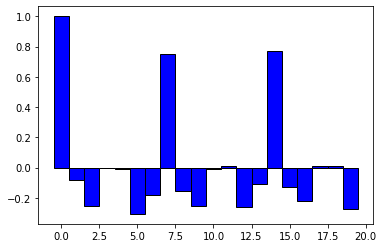

In [109]:
from statsmodels.tsa.stattools import acf, pacf
acf_vals = acf(input_daily_diff)
pacf_vals = pacf(input_daily_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags], color="b", edgecolor="k", width=1)
#plt.bar(range(num_lags), pacf_vals[:num_lags], color="r", edgecolor="k", width=1)
#input.plot()

<BarContainer object of 15 artists>

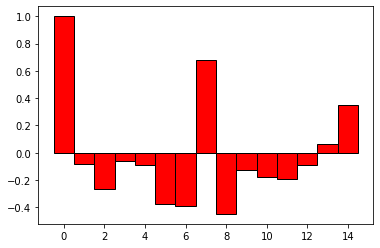

In [110]:
plt.bar(range(num_lags-5), pacf_vals[:num_lags-5], color="r", edgecolor="k", width=1)

<BarContainer object of 20 artists>

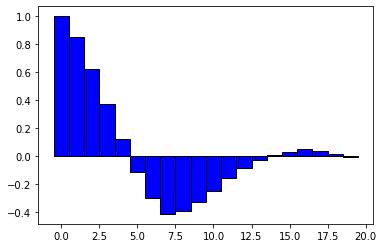

In [111]:
from statsmodels.tsa.stattools import acf, pacf
acf_vals = acf(input_daytype_diff)
pacf_vals = pacf(input_daytype_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags], color="b", edgecolor="k", width=1)
#plt.bar(range(num_lags), pacf_vals[:num_lags], color="r", edgecolor="k", width=1)
#input.plot()

<BarContainer object of 15 artists>

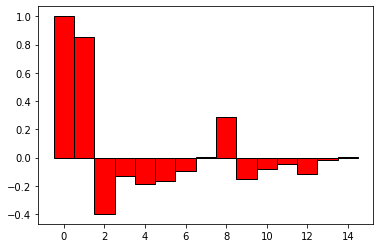

In [112]:
plt.bar(range(num_lags-5), pacf_vals[:num_lags-5], color="r", edgecolor="k", width=1)

In [33]:
def calc_MAPE(predicted, real):
    return abs((real-predicted)/real)*100

In [90]:
arima_model_daily = ARIMA(order=(6,1,1), seasonal_order=(1,1,1,7),maxiter=50, num_lags=20)
arima_model_daily.fit(input_daily_diff)

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(order=(6, 1, 1), seasonal_order=(1, 1, 1, 7))

In [91]:
arima_model_daily.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  278
Model:             SARIMAX(6, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 -89.216
Date:                           Fri, 26 Aug 2022   AIC                            200.432
Time:                                   15:42:11   BIC                            240.014
Sample:                               01-02-2021   HQIC                           216.326
                                    - 10-06-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -4.47e-05      0.001     -0.071      0.943      -0.001       0.001
ar.L1         -0.0143      0.148     -0.097      0.923      -0.304       0.275
ar.L2         -0.1699      0.112     -1.519      0.129      -0.389       0.049
ar.L3         -0.1442      0.099     -1.457      0.145      -0.338       0.050
ar.L4         -0.1004      0.091     -1.099      0.272      -0.280       0.079
ar.L5         -0.1739      0.073     -2.387      0.017      -0.317      -0.031
ar.L6         -0.1281      0.076     -1.679      0.093      -0.278       0.021
ma.L1         -0.6774      0.152     -4.460      0.000      -0.975      -0.380
ar.S.L7        0.0994      0.086      1.162      0.245      -0.068       0.267
ma.S.L7       -0.9702      0.054    -18.081      0.000      -1.075      -0.865
sigma2         0.1015      0.007     15.584      0.000       0.089       0.114
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               742.33
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.88   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


DatetimeIndex(['2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-20'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
               '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
               '2021-12-31'],
              dtype='datetime64[ns]', name='Zaman', freq=None)
2021-12-14 00:00:00
            prediction_load_diff  prediction_MAPE  prediction_load
2021-12-15              0.115985    463850.806460     2.148844e+08
2021-12-16              0.014119    458296.102193     2.148844e+08
2021-12-17             -0.031400    457402.400768     2.148843e+08
2021-12-18             -0.533108    482426.654524     2.148818e+08
2021-12-19             -0.697961    529111.750219     2.148785e+08
2021-12-20              1.413446    45

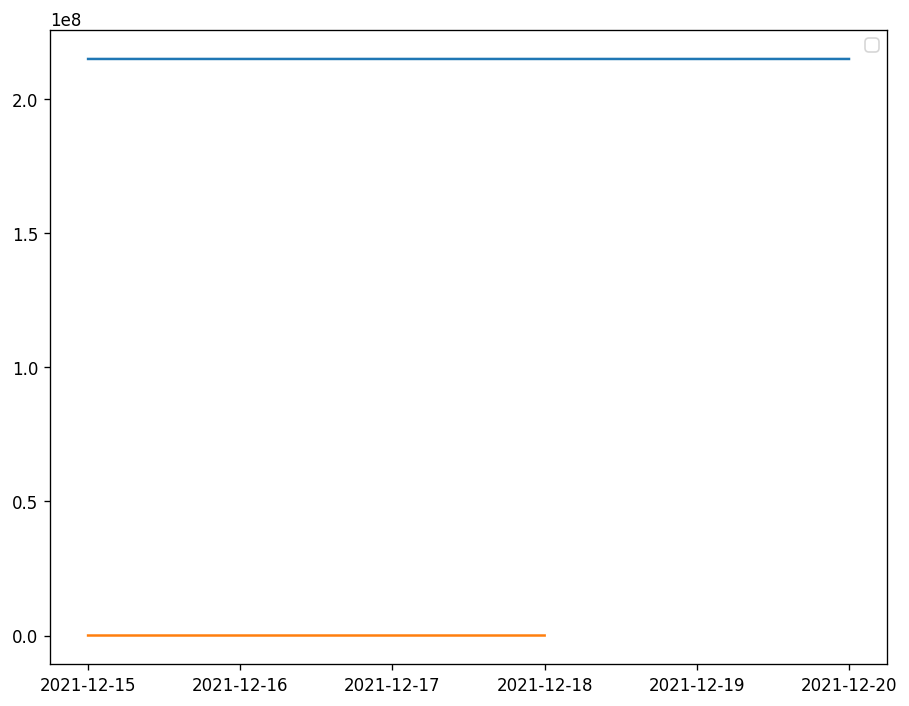

In [68]:
number_of_predicts = 6
load_list = [0] * number_of_predicts
mape_list = [0] * number_of_predicts
prediction = pd.DataFrame(arima_model_daily.predict(number_of_predicts))
print(prediction.index)

print(test.index)
print(train.index[-1])
prediction.columns = ['prediction_load_diff']
#prediction['prediction_laod'] = np.array([0]*number_of_predicts)

load_list[0] = (df.loc[train.index[-1]]["Deger"] + prediction.loc[test.index[0]]["prediction_load_diff"])
for i in range(1,number_of_predicts):
    load_list[i] = load_list[i-1] + prediction.loc[test.index[i]]['prediction_load_diff']
prediction.insert(1, "prediction_load", np.array(load_list), True )
prediction['prediction_load'] = prediction['prediction_load'].map(lambda x: x*dev+avg)
for i in range(number_of_predicts):
    mape_list[i] = calc_MAPE(prediction["prediction_load"][i], test["Deger"][i])
prediction.insert(1, "prediction_MAPE", np.array(mape_list), True )
plt.plot(prediction["prediction_load"])
plt.plot(test[:datetime.datetime(year=2021,month=12,day=18)]["Deger"])
#plt.plot(test['Deger'])
plt.legend()
print(prediction)

DatetimeIndex(['2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10',
               '2021-10-11', '2021-10-12'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10',
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-20', '2021-11-21', '2021-11-22',

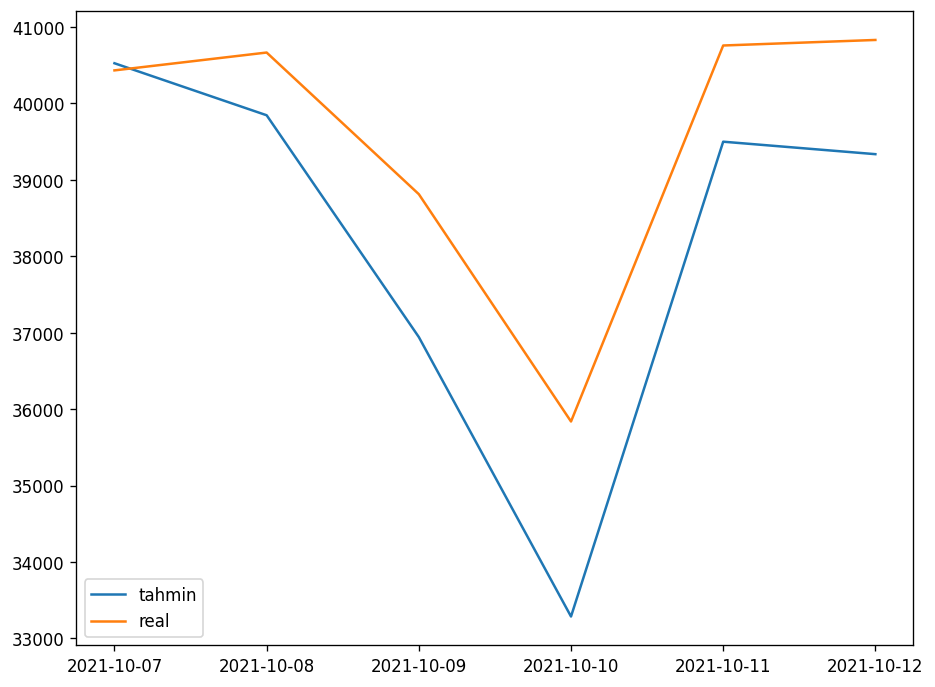

In [92]:
########revised
number_of_predicts = 6
load_list = [0] * number_of_predicts
mape_list = [0] * number_of_predicts
prediction = pd.DataFrame(arima_model_daily.predict(number_of_predicts))
print(prediction.index)

print(test.index)
print(train.index[-1])
prediction.columns = ['prediction_load_diff']
#prediction['prediction_laod'] = np.array([0]*number_of_predicts)

load_list[0] = ((train.loc[train.index[-1]]["Deger"]-avg)/dev + prediction.loc[test.index[0]]["prediction_load_diff"])
#print("---->",load_list[0],train.loc[train.index[-1]]["Deger"],prediction.loc[test.index[0]]["prediction_load_diff"])
for i in range(1,number_of_predicts):
    load_list[i] = load_list[i-1] + prediction.loc[test.index[i]]['prediction_load_diff']
prediction.insert(1, "prediction_load", np.array(load_list), True )
prediction['prediction_load'] = prediction['prediction_load'].map(lambda x: x*dev+avg)
for i in range(number_of_predicts):
    mape_list[i] = calc_MAPE(prediction["prediction_load"][i], test["Deger"][i])
prediction.insert(1, "prediction_MAPE", np.array(mape_list), True )
plt.plot(prediction["prediction_load"],label = "tahmin")
plt.plot(test[:datetime.datetime(year=2021,month=10,day=12)]["Deger"],label = "real")
#plt.plot(test['Deger'])
plt.legend()
print(prediction)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


            prediction_load_diff  prediction_MAPE  prediction_load
2021-12-17           2436.001161         4.991508     49313.461161
2021-12-18           2468.676797        16.279092     51782.137958
2021-12-19           2263.048010        33.104714     54045.185968
2021-12-20           1863.977800        17.549105     55909.163768
2021-12-21           1934.424584        21.154466     57843.588352
2021-12-22           1994.857451        25.952977     59838.445803


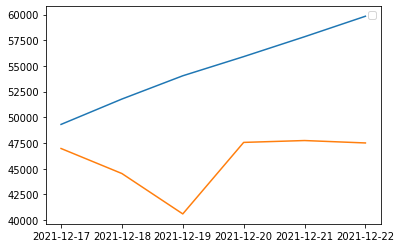

In [102]:
number_of_predicts = 6
load_list = [0] * number_of_predicts
mape_list = [0] * number_of_predicts
prediction = pd.DataFrame(arima_model_daytype.predict(number_of_predicts))
prediction.columns = ['prediction_load_diff']
#prediction['prediction_laod'] = np.array([0]*number_of_predicts)

load_list[0] = (df.loc[train.index[-1]]["Deger"] + prediction.loc[test.index[0]]["prediction_load_diff"])
for i in range(1,number_of_predicts):
    load_list[i] = load_list[i-1] + prediction.loc[test.index[i]]['prediction_load_diff']
prediction.insert(1, "prediction_load", np.array(load_list), True )
for i in range(number_of_predicts):
    mape_list[i] = calc_MAPE(prediction["prediction_load"][i], test["Deger"][i])
prediction.insert(1, "prediction_MAPE", np.array(mape_list), True )
plt.plot(prediction["prediction_load"])
plt.plot(test[:datetime.datetime(year=2021,month=12,day=22)]["Deger"])
#plt.plot(test['Deger'])
plt.legend()
print(prediction)